# Sentiment Analysis in Keras LSTM Implementation

In [18]:
# Import the necesary packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.constraints import max_norm
from sklearn.model_selection import train_test_split
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
from PreProcessing import Cleaned_X_Y

In [19]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [34]:
filename = "Roman Urdu DataSet.csv"

In [35]:
X_data, y_data = Cleaned_X_Y(filename)

ValueError: Length mismatch: Expected axis has 4 elements, new values have 3 elements

In [22]:
print("Data available and its shapes: X : {}, Y : {}".format(X_data.shape, y_data.shape))

Data available and its shapes: X : (20227,), Y : (20227,)


In [23]:
corp = []
for sentence in X_data:
    corp = corp + sentence.split()
print("Total No of Words : ", len(corp))
print("Size of the Vocabuary : ", len(set(corp)))

Total No of Words :  199068
Size of the Vocabuary :  31958


In [24]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50
# This is fixed.
EMBEDDING_DIM = 300

In [25]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(X_data)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 31958 unique tokens.


In [26]:
X = tokenizer.texts_to_sequences(X_data)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (20227, 50)


In [27]:
Y = pd.get_dummies(y_data).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (20227, 3)


In [28]:
# Train Test Split the data.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(18204, 50) (18204, 3)
(2023, 50) (2023, 3)


In [29]:
# Construct the Model.
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(60, dropout=0.3, recurrent_dropout=0.3, kernel_constraint=max_norm(3), recurrent_constraint=max_norm(3), bias_constraint=max_norm(3)))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 300)           6000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 50, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60)                86640     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 183       
Total params: 6,086,823
Trainable params: 6,086,823
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
epochs = 15
batch_size = 64
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/15
256/256 [==============================] - 69s 270ms/step - loss: 0.9410 - accuracy: 0.5524 - val_loss: 0.8296 - val_accuracy: 0.6315
Epoch 2/15
256/256 [==============================] - 77s 299ms/step - loss: 0.7228 - accuracy: 0.6939 - val_loss: 0.7860 - val_accuracy: 0.6628
Epoch 3/15
256/256 [==============================] - 76s 298ms/step - loss: 0.6091 - accuracy: 0.7571 - val_loss: 0.8004 - val_accuracy: 0.6628
Epoch 4/15
256/256 [==============================] - 74s 290ms/step - loss: 0.5333 - accuracy: 0.7925 - val_loss: 0.8293 - val_accuracy: 0.6716
Epoch 5/15
256/256 [==============================] - 74s 288ms/step - loss: 0.4682 - accuracy: 0.8219 - val_loss: 0.8685 - val_accuracy: 0.6738


In [31]:
# Evaluate the Model Accuracy on the Test data. 
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

64/64 [==============================] - 1s 15ms/step - loss: 0.8999 - accuracy: 0.6614
Test set
  Loss: 0.900
  Accuracy: 0.661


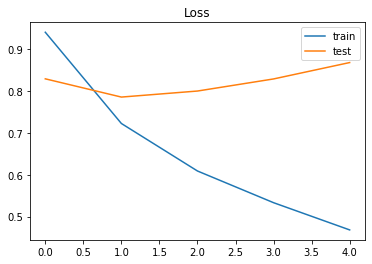

In [32]:
# Training vs Validation Loss Function
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

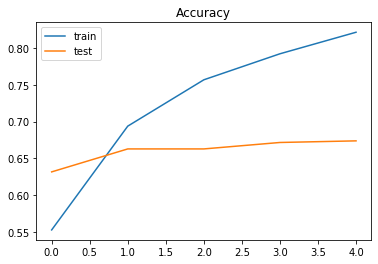

In [33]:
# Training vs Validation Accuracy
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [17]:
new_complaint = ['dil me khud aaka ho nala jm hai akbaal sjdo me pde rahna rahne se jnnat nahi milee yhi likha hai bahi']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['Negative','Neutral','Positive']
print(pred, labels[np.argmax(pred)])

[[0.23446064 0.35071087 0.41482845]] Positive
